### Objective
### This file  contains the required implementation for unsupervised machine  learning.
### The data dimensionality is handled with PCA.
### The available samples are grouped into clusters with kmeans, lmeans++ and DBSCAN algorithms.


In [1]:

#pip install import-ipynb

In [2]:
import pandas as pd
import numpy as np

#import it from the notebook
import import_ipynb
from  cc_fi_initializing_variables  import *
import cc_fi_fcts_data_treatment
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster

import os

import pickle

#from scipy.linalg import svd
#from sklearn.decomposition import PCA

#from sklearn.cluster import DBSCAN

importing Jupyter notebook from cc_fi_initializing_variables.ipynb
importing Jupyter notebook from cc_fi_fcts_data_treatment.ipynb


## Exploration dataframes
### df_4: dataframe with one  deleted  feature and all rows with missing values
### df_b: dataframe with many  deleted  features and all rows with missing values

In [3]:
#the name of the dataframe  when saved in memory through a .pkl, pickle file
#this variable is initialized in the file with the initializations named
#cc_fi_initializing_variables

val_name_data_1_for_pickle

'my_df_4.pkl'

In [4]:
#read DataFrame df_4 from pickle file


#initialize variable v_dataframe_1 with value of variable 
#val_name_dataframe_1 initialized in file cc_fi_initializing_variables
v_dataframe_1=val_name_dataframe_1

#v_dataframe_1=df_4 

#load from memory dataframe named val_name_data_1_for_pickle
#this dataframe was saved in memory after the data treatment in 
#file cc_fi_preparing_df.ipynb
v_dataframe_1=pd.read_pickle(val_name_data_1_for_pickle)

#v_dataframe_1

In [5]:
#read DataFrame df_c from pickle file

#initialize variable v_dataframe_2 with valu eof variable 
#val_name_dataframe_1 initialized in file cc_fi_initializing_variables
v_dataframe_2=val_name_dataframe_2

#load from memory dataframe named val_name_data_1_for_pickle
#this dataframe was saved in memory after the data treatment in 
#file cc_fi_preparing_df.ipynb
v_dataframe_2=pd.read_pickle(val_name_data_2_for_pickle)

#v_dataframe_2

In [6]:
#information on v_dataframe_1=dataframe df_4
v_dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61005 entries, 32 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        61005 non-null  float64
 1   price         61005 non-null  int64  
 2   year          61005 non-null  float64
 3   manufacturer  61005 non-null  float64
 4   model         61005 non-null  float64
 5   condition     61005 non-null  float64
 6   cylinders     61005 non-null  float64
 7   fuel          61005 non-null  float64
 8   odometer      61005 non-null  float64
 9   title_status  61005 non-null  float64
 10  transmission  61005 non-null  float64
 11  VIN           61005 non-null  float64
 12  drive         61005 non-null  float64
 13  type          61005 non-null  float64
 14  paint_color   61005 non-null  float64
 15  state         61005 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 7.9 MB


In [7]:
#information on v_dataframe_2 which is dataframe df_c
v_dataframe_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389604 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  float64
 1   price         389604 non-null  int64  
 2   year          389604 non-null  float64
 3   manufacturer  389604 non-null  float64
 4   model         389604 non-null  float64
 5   fuel          389604 non-null  float64
 6   odometer      389604 non-null  float64
 7   title_status  389604 non-null  float64
 8   transmission  389604 non-null  float64
 9   state         389604 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 32.7 MB


In [8]:
#print the first rows  of df_c
#df_c.head()
v_dataframe_2.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
27,27192.910448,33590,2014.0,31131.718507,35232.105263,59280.728984,57923.0,65617.252593,28255.175242,42729.805087
28,27275.000000,22590,2010.0,23950.670750,20613.209181,59280.762350,71229.0,65617.281760,28255.360505,42732.280891
29,27148.134328,39590,2020.0,23950.345858,34380.810204,59280.710784,19160.0,65617.236683,28255.074189,42728.454648
30,27212.313433,30990,2017.0,245672.903654,34760.978593,59280.736871,41124.0,65617.259487,28255.219032,42730.390277
31,27331.641791,15000,2013.0,37421.667910,18868.563559,59280.785372,128000.0,65617.301885,65645.490178,42733.989196


In [9]:

#list with the columns of dataframe 1 (df_4)
v_feature_keys_1=v_dataframe_1.columns.tolist()


#list with the columns of dataframe 2 (df_c)
v_feature_keys_2=v_dataframe_2.columns.tolist()

#a list with the names of each feature
v_titles=v_dataframe_1.columns.tolist()

#variable val_colors_for_feature_subplots is a 
#list with colors initialized in file 
#cc_fi_initializing_variables
v_colors=val_colors_for_feature_subplots





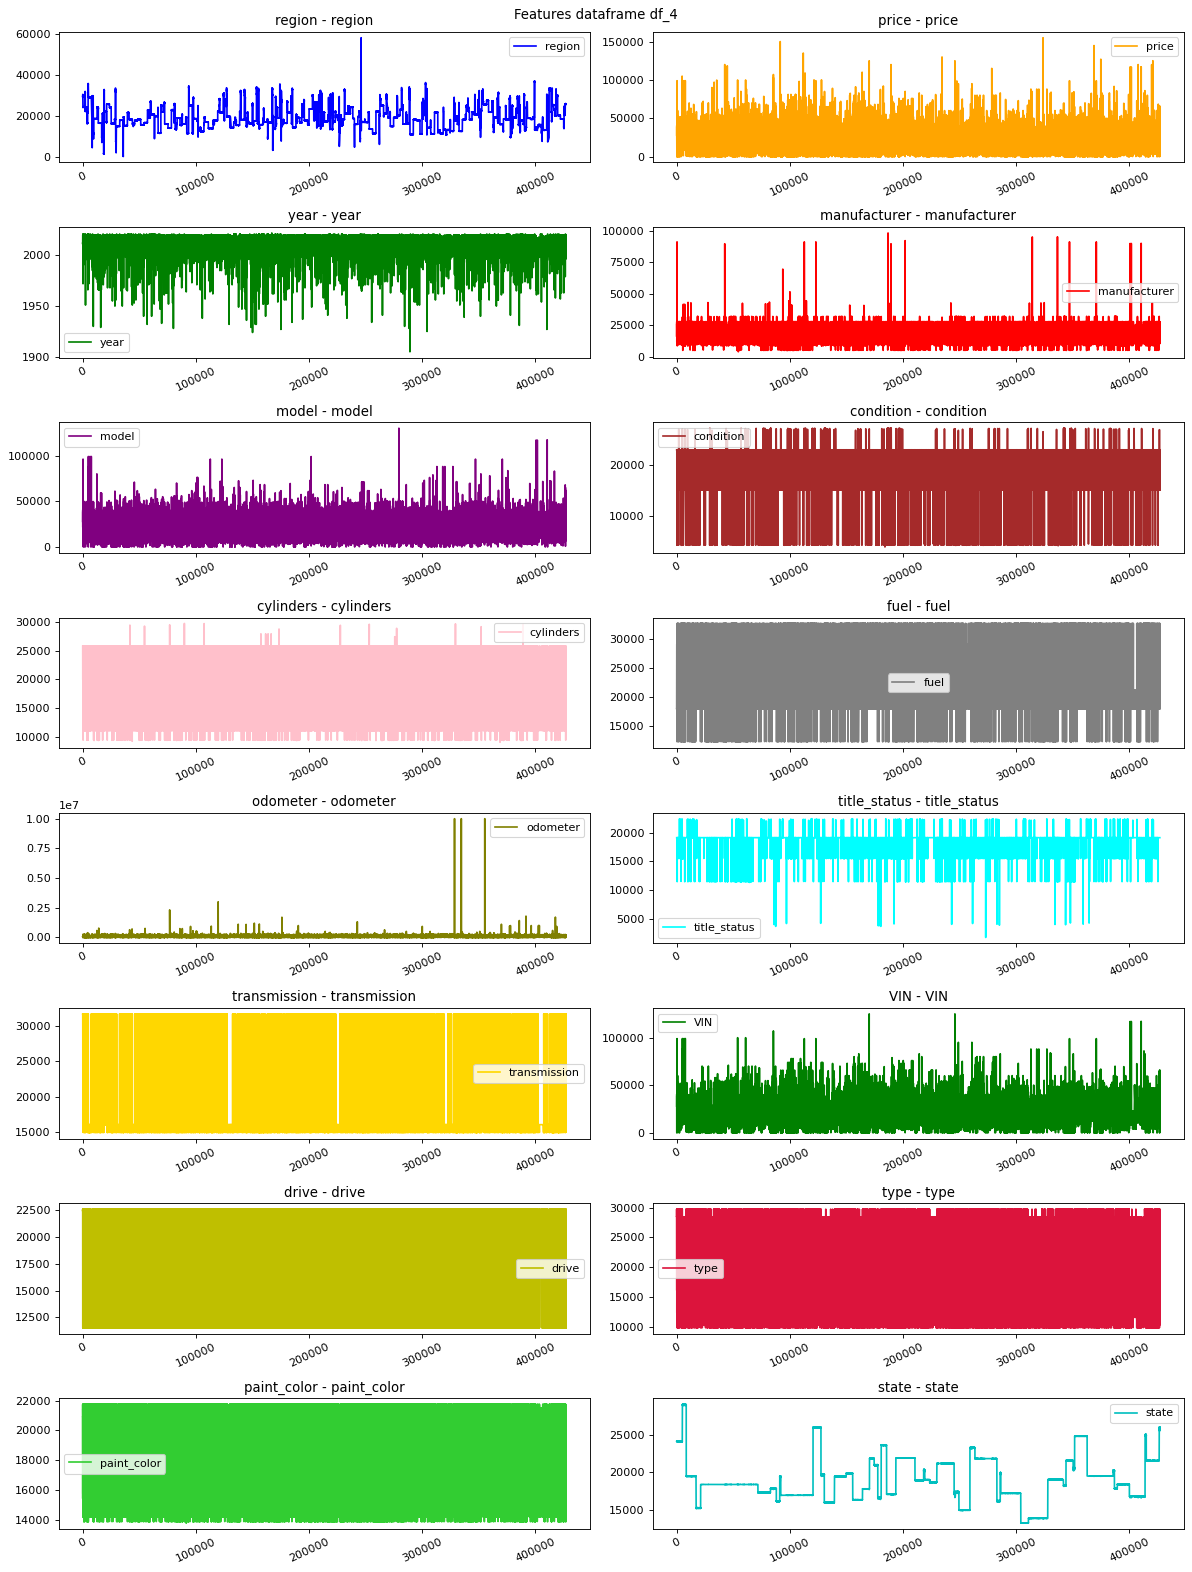

In [10]:
#plots of each feature of the v_dataframe_1 (df_4)
#function fct_show_raw_visualization is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=v_dataframe_1,
    feature_keys=v_feature_keys_1,
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_1)



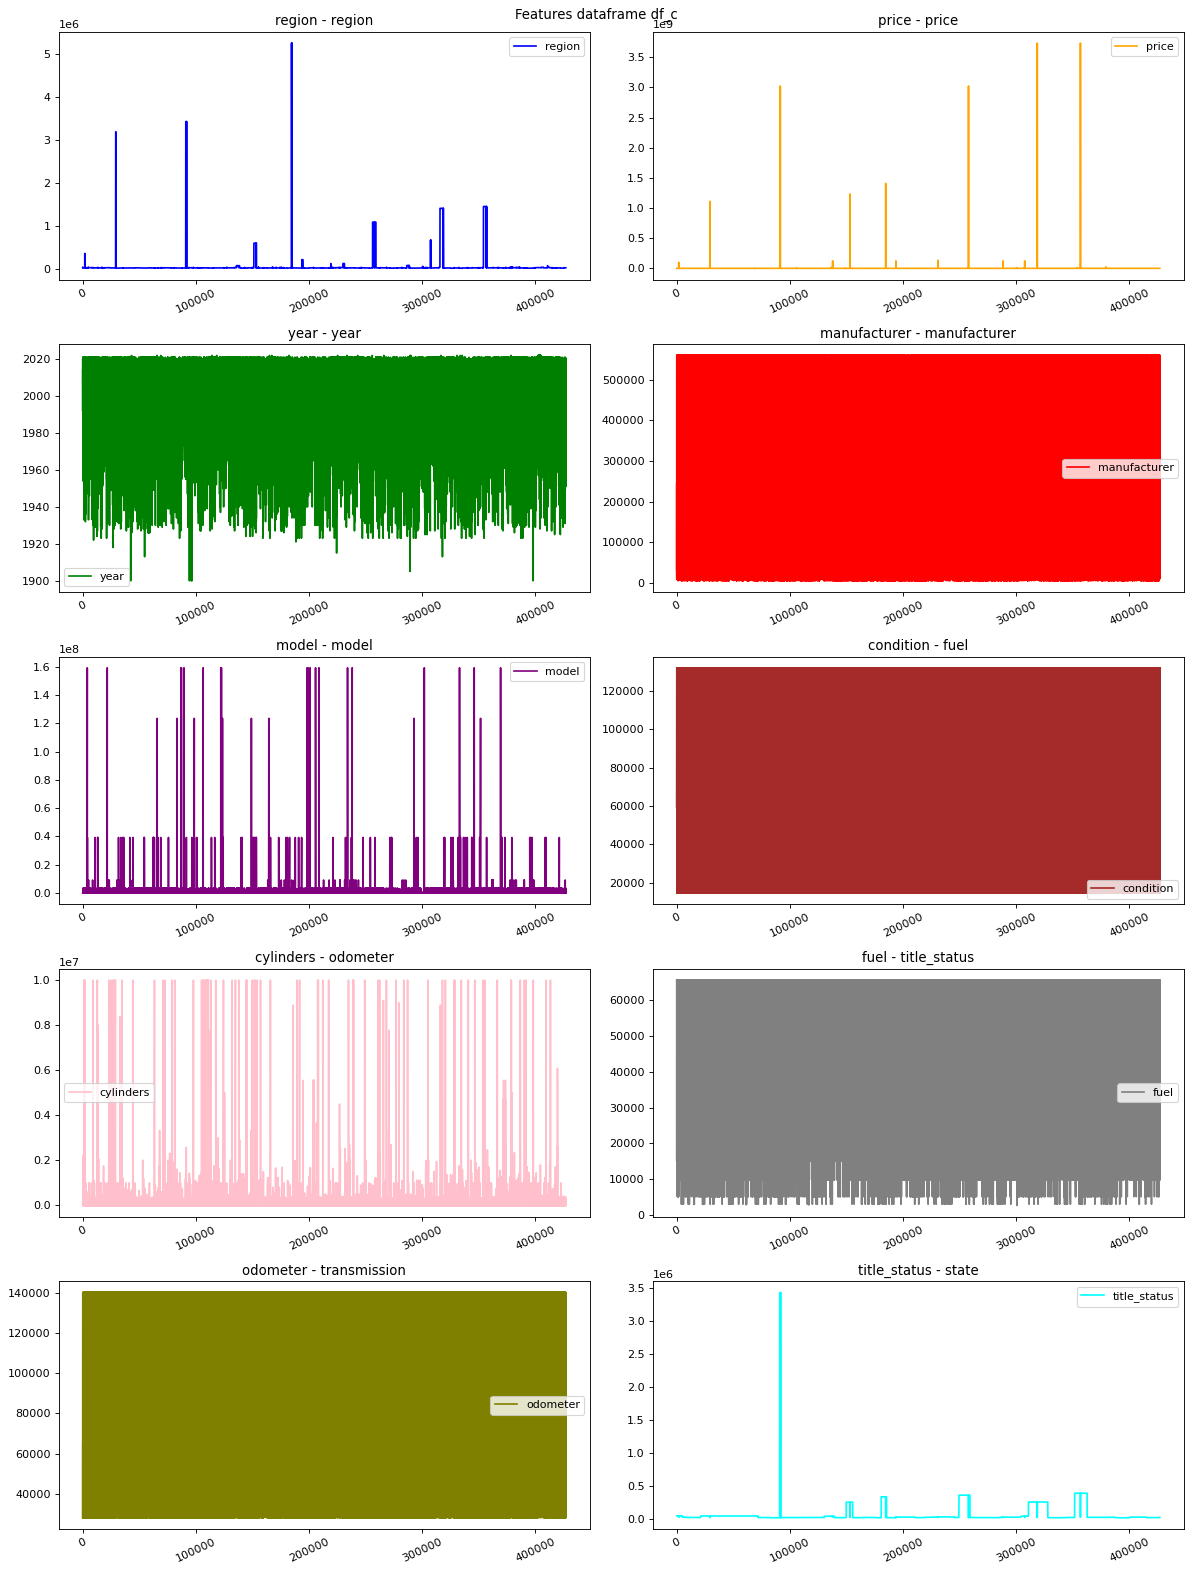

In [11]:
#plots of each feature of the v_dataframe_2 (df_c)
#function fct_show_raw_visualization is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=v_dataframe_2,
    feature_keys=v_feature_keys_2,
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_2)

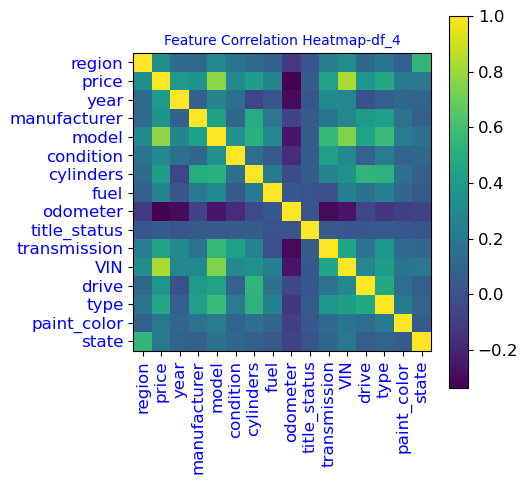

In [12]:
#plot of the feature heatmap for df_4
#function fct_show_feature_heatmap is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=v_dataframe_1,\
val_name_dataframe=val_name_dataframe_1)

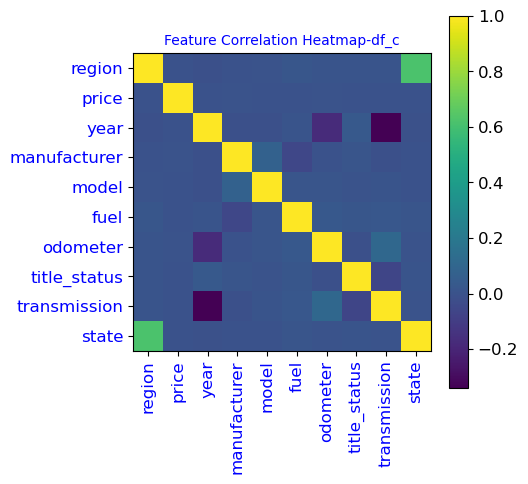

In [13]:
#plot of the feature heatmap for df_c
#function fct_show_feature_heatmap is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=v_dataframe_2,\
val_name_dataframe=val_name_dataframe_2)

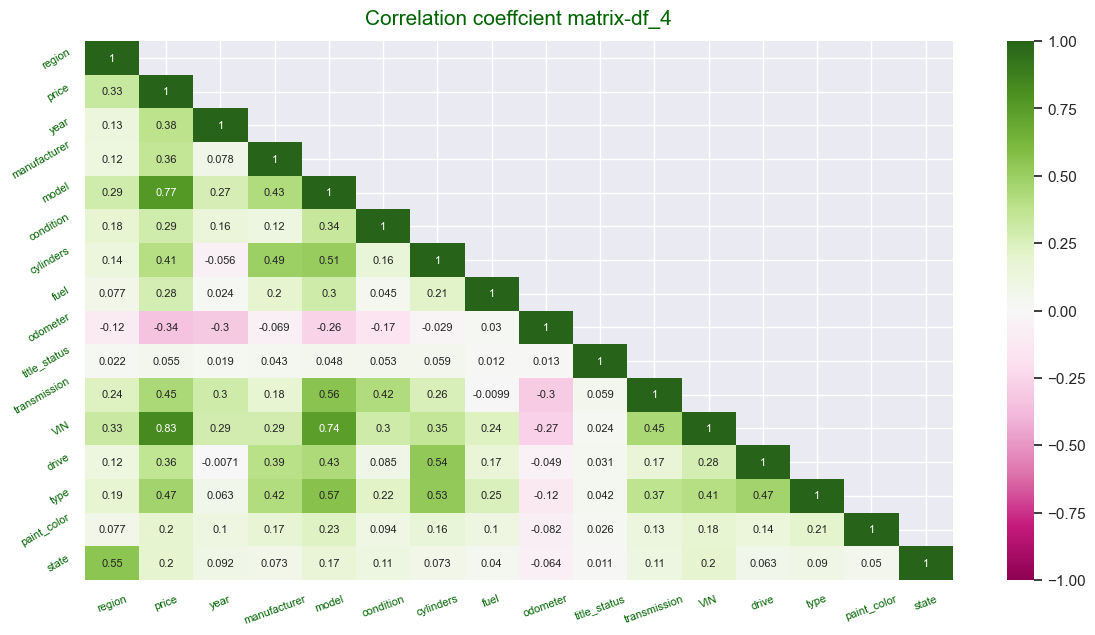

In [14]:
#plot of the correlation matrix for df_4
#fct_show_cor_coef_matrix is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=v_dataframe_1,\
val_name_dataframe=val_name_dataframe_1)

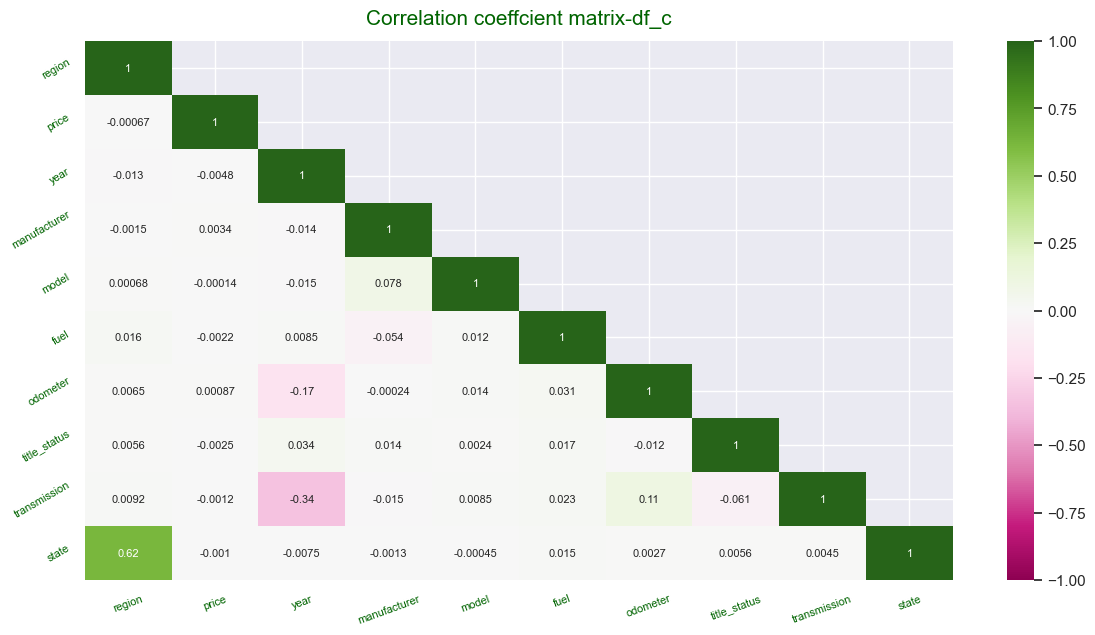

In [15]:
#plot of the correlation matrix for df_b
#fct_show_cor_coef_matrix is defined in file cc_fi_fcts_data_treatment
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=v_dataframe_2,\
val_name_dataframe=val_name_dataframe_2)

## Unsupervised ML

### PCA,  DIMENSIONALITY REDUCTION

#### Data Normalization

In [16]:
#statistics on dataframe val_name_dataframe_1

#df_4.describe()
v_dataframe_1.describe()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
count,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,6.100500e+04,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000,61005.000000
mean,19075.295544,19075.412638,2012.379871,19075.412638,19265.063078,19075.412638,19075.412638,19075.412638,9.077842e+04,19075.412638,19075.412638,21153.090547,19075.412638,19075.412638,19075.412638,19075.412638
std,4885.965525,14023.977342,6.612985,5034.163326,11104.783273,4095.836971,5769.660338,3882.733317,9.492157e+04,782.835984,6243.866167,11273.581822,5071.348410,6614.229759,2841.420729,2841.774775
min,170.370370,0.000000,1905.000000,3950.000000,0.000000,3988.243243,8999.052910,12210.494488,0.000000e+00,1691.666667,14900.874010,0.000000,11509.951941,9787.119457,13774.976744,13181.938289
25%,16076.236641,7962.000000,2010.000000,16110.664589,10108.931034,15108.191913,11069.067929,17955.943044,3.861900e+04,19171.729440,16031.847434,17120.000000,11517.609982,12342.233637,15756.207481,17077.181460
50%,18301.000000,15888.000000,2014.000000,21637.216551,17212.500000,20818.561240,19953.367846,17956.197870,8.619400e+04,19171.957006,16032.082058,19075.412638,22416.595397,16089.751646,20887.957770,18396.319558
75%,21865.418079,29590.000000,2017.000000,21759.312166,27201.177632,22980.798494,25781.961269,17956.325328,1.286320e+05,19172.099272,16032.297311,26995.000000,22417.533134,26456.652904,21499.370373,21197.719491
max,58388.000000,155000.000000,2022.000000,98157.928571,129928.000000,27201.840708,29776.950000,32590.110513,9.999999e+06,22500.042169,31640.652087,124900.000000,22596.415168,29752.953904,21741.853749,29120.033926


In [17]:
#statisticss on dataframe val_name_dataframe_2
#df_c.describe()
v_dataframe_2.describe()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
count,3.896040e+05,3.896040e+05,389604.000000,389604.000000,3.896040e+05,389604.000000,3.896040e+05,389604.000000,389604.000000,3.896040e+05
mean,6.395528e+04,6.395528e+04,2011.605338,63955.275919,6.455711e+04,63955.275919,9.635240e+04,63955.275919,63955.275919,6.395528e+04
std,2.997675e+05,1.144865e+07,8.639863,110665.024594,1.420925e+06,18783.299793,1.914181e+05,9171.206265,22555.362480,1.863155e+05
min,7.233333e+03,0.000000e+00,1900.000000,5120.303931,0.000000e+00,14720.491232,0.000000e+00,2652.182482,28087.252547,1.333109e+04
25%,1.551980e+04,5.995000e+03,2009.000000,19137.171975,9.300616e+03,59280.762638,3.809300e+04,65617.267242,65645.431991,1.697946e+04
50%,1.744443e+04,1.399500e+04,2014.000000,23950.949603,1.525559e+04,59280.800554,8.575300e+04,65617.301898,65645.494097,2.112542e+04
75%,1.978551e+04,2.659000e+04,2017.000000,37421.728373,2.627302e+04,59280.822833,1.333150e+05,65617.325286,65645.522513,3.779510e+04
max,5.260139e+06,3.736929e+09,2022.000000,559729.253707,1.592124e+08,131857.705967,1.000000e+07,65617.341658,140128.442410,3.429322e+06


In [18]:
#initialize variable v_dataframe_1_no_target with value of variable 
#val_name_dataframe_1_no_target initialized in file cc_fi_initializing_variables
##val_name_dataframe_1_no_target=df_5
v_dataframe_1_no_target=val_name_dataframe_1_no_target


#initialize variable v_dataframe_2_no_target with value of variable 
#val_name_dataframe_2_no_target initialized in file cc_fi_initializing_variables
#val_name_dataframe_2_no_target=df_d
v_dataframe_2_no_target=val_name_dataframe_1_no_target

In [19]:
#the df_4 dataframe without the target variable
#val_name_dataframe_1_no_target=df_5

v_dataframe_1_no_target=\
v_dataframe_1.loc[:,v_dataframe_1.columns!=val_name_target_column]
v_dataframe_1_no_target.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive',
       'type', 'paint_color', 'state'],
      dtype='object')

In [20]:
#the df_d dataframe without the target variable
#val_name_dataframe_2_no_target=df_c

v_dataframe_2_no_target=\
v_dataframe_2.loc[:,v_dataframe_2.columns!=val_name_target_column]
v_dataframe_2_no_target.columns

Index(['region', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'state'],
      dtype='object')

In [21]:
#initialize variable v_dataframe_1_no_target_stand with value of variable 
#val_name_dataframe_1_no_target_stand 
#initialized in file cc_fi_initializing_variables
#val_name_dataframe_1_no_target_stand=df_7
v_dataframe_1_no_target_stand=val_name_dataframe_1_no_target_stand


#initialize variable v_dataframe_2_no_target_stand with value of variable 
#val_name_dataframe_2_no_target_stand 
#initialized in file cc_fi_initializing_variables
#val_name_dataframe_2_no_target_stand=df_e
v_dataframe_2_no_target_stand=val_name_dataframe_2_no_target_stand



In [22]:
#df_7=standardized df_5
#we stabdardize dataframe v_dataframe_1_no_target
#function fct_stand_dataframe is defined in file cc_fi_fcts_data_treatment
v_dataframe_1_no_target_stand=\
cc_fi_fcts_data_treatment.fct_stand_dataframe(\
val_df=v_dataframe_1_no_target)
##df_7
#v_dataframe_1_no_target_stand

In [23]:
#df_e=standardized df_d
##we stabdardize dataframe v_dataframe_2_no_target
#function fct_stand_dataframe is defined in file cc_fi_fcts_data_treatment
v_dataframe_2_no_target_stand=\
cc_fi_fcts_data_treatment.fct_stand_dataframe(\
val_df=v_dataframe_2_no_target)
##df_e
#v_dataframe_2_no_target_stand

In [24]:
#statistics on the standardized dataframe 1 without the target
#df_7.describe()
v_dataframe_1_no_target_stand.describe()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
count,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04,6.100500e+04
mean,2.832620e-16,2.790690e-15,-6.242946e-16,4.985039e-16,1.202000e-16,-5.506837e-16,1.444264e-16,6.941783e-17,7.336626e-16,7.826977e-17,1.425628e-16,8.246279e-16,8.572403e-17,1.854248e-16,1.602667e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.869230e+00,-1.623773e+01,-3.004553e+00,-1.734844e+00,-3.683538e+00,-1.746439e+00,-1.768063e+00,-9.563518e-01,-2.220612e+01,-6.685823e-01,-1.876342e+00,-1.491805e+00,-1.404289e+00,-1.865417e+00,-2.073871e+00
25%,-6.138109e-01,-3.598784e-01,-5.889257e-01,-8.245215e-01,-9.685983e-01,-1.387663e+00,-2.883200e-01,-5.495001e-01,1.230357e-01,-4.874488e-01,-3.577470e-01,-1.490295e+00,-1.017984e+00,-1.168150e+00,-7.031631e-01
50%,-1.584734e-01,2.449922e-01,5.088838e-01,-1.848359e-01,4.255903e-01,1.521676e-01,-2.882544e-01,-4.829688e-02,1.233264e-01,-4.874112e-01,-1.842962e-01,6.588352e-01,-4.513996e-01,6.379010e-01,-2.389679e-01
75%,5.710483e-01,6.986451e-01,5.331372e-01,7.146573e-01,9.535013e-01,1.162382e+00,-2.882215e-01,3.987880e-01,1.235082e-01,-4.873768e-01,5.181946e-01,6.590201e-01,1.115964e+00,8.530795e-01,7.468244e-01
max,8.046046e+00,1.454733e+00,1.570917e+01,9.965340e+00,1.984070e+00,1.854795e+00,3.480718e+00,1.043938e+02,4.374645e+00,2.012413e+00,9.202657e+00,6.942932e-01,1.614329e+00,9.384183e-01,3.534630e+00


In [25]:

#statisticss on the standardized dataframe 1 without the target
#df_e.describe()
v_dataframe_2_no_target_stand.describe()

,region,year,manufacturer,model,fuel,odometer,title_status,transmission,state
count,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05,3.896040e+05
mean,-3.122271e-17,9.009356e-15,-1.733298e-16,4.194639e-19,-1.014300e-15,-1.488185e-17,1.143130e-15,4.222361e-16,-5.719300e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.892198e-01,-1.291749e+01,-5.316492e-01,-4.543315e-02,-2.621200e+00,-5.033609e-01,-6.684300e+00,-1.590222e+00,-2.717122e-01
25%,-1.615768e-01,-3.015485e-01,-4.049889e-01,-3.888768e-02,-2.488654e-01,-3.043568e-01,1.812184e-01,7.493367e-02,-2.521305e-01
50%,-1.551564e-01,2.771644e-01,-3.614902e-01,-3.469677e-02,-2.488634e-01,-5.537301e-02,1.812222e-01,7.493642e-02,-2.298782e-01
75%,-1.473467e-01,6.243921e-01,-2.397645e-01,-2.694307e-02,-2.488622e-01,1.930988e-01,1.812247e-01,7.493768e-02,-1.404079e-01
max,1.733404e+01,1.203105e+00,4.479952e+00,1.120030e+02,3.615043e+00,5.173830e+01,1.812265e-01,3.377164e+00,1.806273e+01


In [26]:
#hereafterand for the PCA work
#there willbe  considered the dataframes
#v_dataframe_1_no_target_stand which is df_7
#and
#v_dataframe_2_no_target_stand which is df_e

## Perform  SVD

response svd decomposition verification:  True


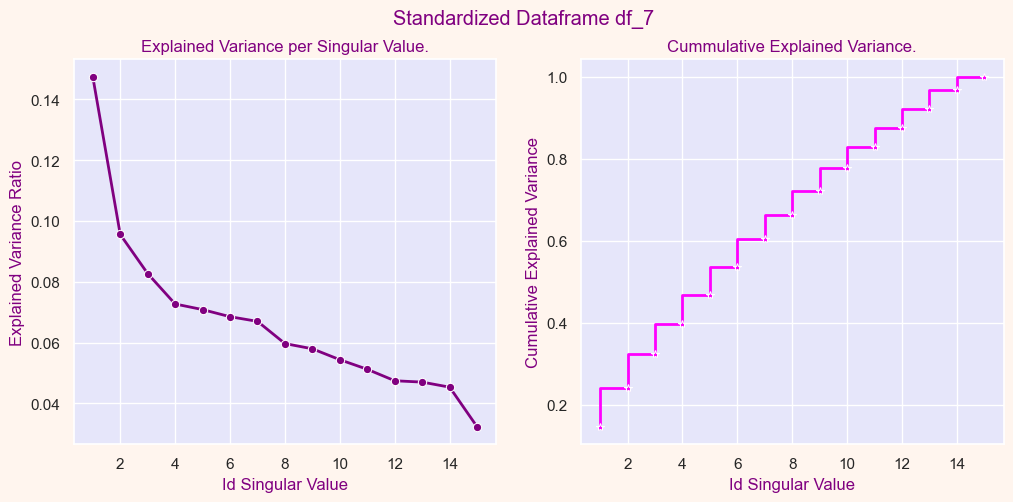

New (PC space) dimension:  10


In [27]:
#we obtain the datframe with the principal components
#from dataframe v_dataframe_1_no_target_stand
#function fct_data_projected_in_lower_dimension_space is defined in
#file cc_fi_fcts_data_treatment
df_7_pcs=\
cc_fi_fcts_data_treatment.fct_data_projected_in_lower_dimension_space(\
val_initial_standardized_matrix_to_decompose=v_dataframe_1_no_target_stand,\
val_desire_explained_variance=val_desired_explained_variance,\
val_name_standardized_dataframe=val_name_dataframe_1_no_target_stand)

In [28]:
# we examine the dataframe with the principal components
df_7_pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.579996,-0.737358,-1.648207,0.846455,0.777909,0.859370,0.452206,0.149098,-0.299563,-0.326768
1,-3.329682,-1.844001,-1.390367,0.806565,1.297625,-0.592458,-0.633577,0.113260,0.238947,0.022103
2,-3.362805,-1.750909,-1.268825,0.455029,0.324343,0.928817,0.428107,-0.141464,0.075103,0.199972
3,-4.261757,-1.093388,-1.378526,0.625055,0.648659,0.679653,0.645614,-0.527247,0.602151,-0.438783
4,-3.258250,-1.804572,-1.390518,0.812247,1.287212,-0.488760,-0.693461,0.228685,0.061813,0.145014
...,...,...,...,...,...,...,...,...,...,...
61000,-4.009581,-3.091426,-0.734807,0.014083,-0.172446,-0.243840,0.567263,0.069623,1.011334,-1.404069
61001,-3.635679,-0.641092,-1.739579,-0.039197,0.033133,0.636944,-0.183132,0.080759,-0.170401,0.084117
61002,-3.384581,-0.436619,-1.858771,0.090108,0.106136,0.733224,-0.077650,0.102002,-0.331064,0.243810
61003,-1.626591,-1.726249,-1.838295,-0.184341,-0.443153,0.870990,-0.062570,0.096346,-0.548357,0.510665


In [29]:
#we save in memory datframe df_7_pcs
with open(val_name_dataframe_1_pcs_for_pickle, 'wb') as fp0:
    pickle.dump(df_7_pcs,fp0)

In [30]:
#import sys
#sys.exit()

response svd decomposition verification:  True


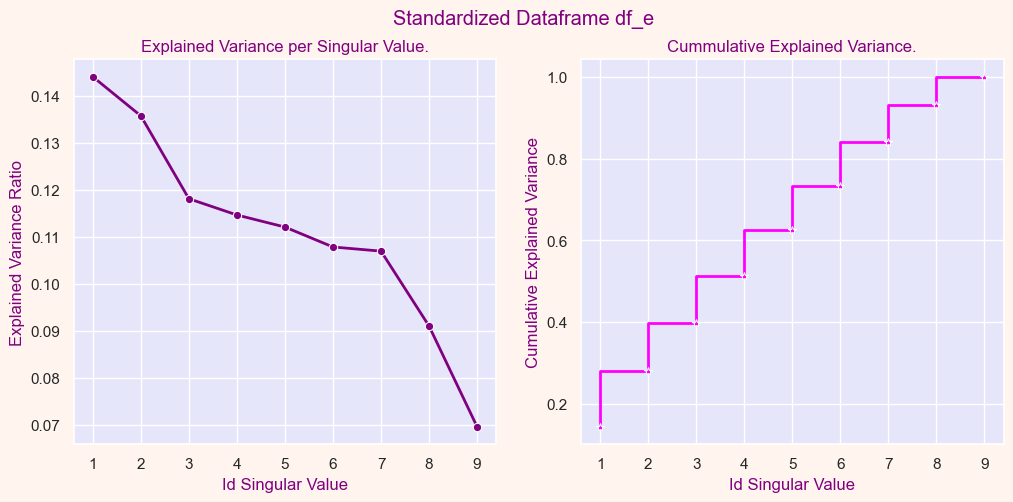

New (PC space) dimension:  6


In [31]:
#we obtain the datframe with the principal components
#from dataframe v_dataframe_2_no_target_stand
#function fct_data_projected_in_lower_dimension_space is defined in
#file cc_fi_fcts_data_treatment
df_e_pcs=\
cc_fi_fcts_data_treatment.fct_data_projected_in_lower_dimension_space(\
val_initial_standardized_matrix_to_decompose=v_dataframe_2_no_target_stand,\
val_desire_explained_variance=val_desired_explained_variance,\
val_name_standardized_dataframe=val_name_dataframe_2_no_target_stand)

In [32]:
# we print the datframe df_e_pcs
df_e_pcs

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.296893,-1.257538,0.072837,0.008186,0.142516,-0.410279
1,-0.262235,-0.930623,0.106097,0.013371,0.214928,-0.372756
2,-0.351838,-1.788838,0.149730,0.027092,0.014263,-0.358526
3,-0.335620,-1.518994,-1.324721,0.042607,0.245966,-0.777932
4,-0.173371,-0.011017,0.106561,0.042022,0.231900,-0.049134
...,...,...,...,...,...,...
389599,-0.437468,-1.676378,0.181397,0.014603,0.039194,-0.386174
389600,-0.470594,-1.796487,-2.333195,0.082148,0.297755,-0.990567
389601,-0.298931,-1.659777,1.544349,-2.690684,-1.484529,-0.286611
389602,-0.430185,-1.606179,0.175635,0.021680,0.053712,-0.356310


## Clustering, Sample grouping

In [33]:
#datasets v_dataframe_1, v_dataframe_2 are going to be employed
#that is df_4 and df_c

#we need to standardize dataframes v_dataframe_1, v_dataframe_2 too
v_dataframe_1_stand=\
cc_fi_fcts_data_treatment.fct_stand_dataframe(\
val_df=v_dataframe_1)

v_dataframe_2_stand=\
cc_fi_fcts_data_treatment.fct_stand_dataframe(\
val_df=v_dataframe_2)

In [34]:
#information on the standardized datframe v_dataframe_1_stand
v_dataframe_1_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61005 entries, 32 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        61005 non-null  float64
 1   price         61005 non-null  float64
 2   year          61005 non-null  float64
 3   manufacturer  61005 non-null  float64
 4   model         61005 non-null  float64
 5   condition     61005 non-null  float64
 6   cylinders     61005 non-null  float64
 7   fuel          61005 non-null  float64
 8   odometer      61005 non-null  float64
 9   title_status  61005 non-null  float64
 10  transmission  61005 non-null  float64
 11  VIN           61005 non-null  float64
 12  drive         61005 non-null  float64
 13  type          61005 non-null  float64
 14  paint_color   61005 non-null  float64
 15  state         61005 non-null  float64
dtypes: float64(16)
memory usage: 7.9 MB


In [35]:
#information on the standardized datframe v_dataframe_2_stand
v_dataframe_2_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389604 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  float64
 1   price         389604 non-null  float64
 2   year          389604 non-null  float64
 3   manufacturer  389604 non-null  float64
 4   model         389604 non-null  float64
 5   fuel          389604 non-null  float64
 6   odometer      389604 non-null  float64
 7   title_status  389604 non-null  float64
 8   transmission  389604 non-null  float64
 9   state         389604 non-null  float64
dtypes: float64(10)
memory usage: 32.7 MB


In [36]:
#we create a list of indices: numbers starting from 0 to the 
#number of rows of datframe v_dataframe_1
#the number of rows of datframe v_dataframe_1
li_indices=list(range(0, v_dataframe_1.shape[0]))
len(li_indices)

61005

In [37]:
#we set as index of dataframe v_dataframe_1 th elist of the
#previsouly created indices
v_dataframe_1.set_index([li_indices],inplace=True)
v_dataframe_1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
0,29619.642857,27990,2012.0,25572.370087,27990.000000,22980.748306,25782.527539,17955.924836,68696.0,19171.763069,31638.333499,27990.0,22416.523430,28460.292528,20887.563147,24168.985770
1,29383.928571,34590,2016.0,21757.468406,33475.407166,22980.511705,19952.703691,17955.804661,29499.0,19171.652094,31637.786779,34590.0,22416.285343,28459.470610,15752.844154,24160.447607
2,29548.214286,29990,2016.0,21757.950435,28885.343629,22980.676609,19952.898408,17955.888420,17302.0,19171.729440,31638.167826,29990.0,22416.451282,28460.043462,21737.197640,24166.398448
3,29241.071429,38590,2011.0,21757.049251,38406.126374,22980.368310,25781.961269,17955.731828,30237.0,19171.584837,31637.455434,38590.0,22593.725220,29739.679051,21735.862444,24155.272962
4,29441.071429,32990,2017.0,22359.832294,29700.045455,22980.569063,19952.771419,17955.833795,30041.0,19171.678997,31637.919317,32990.0,22416.343061,29741.605435,15753.032345,24162.517464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61000,25705.750000,48590,2020.0,18918.976744,48699.090909,22980.009823,19952.111073,17955.549745,7701.0,19171.416693,31636.627071,48590.0,11515.307631,29736.239078,20885.934045,25705.750000
61001,25775.104839,39990,2017.0,23281.595657,38856.666667,22980.318122,25781.886479,17955.706336,41664.0,19171.561297,16031.435590,39990.0,22416.090545,29739.197454,20886.614156,25775.104839
61002,25831.556452,32990,2016.0,23288.834540,39036.153846,22980.569063,25782.260431,17955.833795,55612.0,19171.678997,16031.586433,32990.0,22594.115572,29741.605435,20887.167734,25831.556452
61003,25826.717742,33590,2018.0,20103.253689,26662.463768,22980.547553,19952.746021,17955.822870,30814.0,19171.668909,16031.573503,33590.0,22594.073749,12340.456222,21498.652209,25826.717742


In [1]:
#v_dataframe_1.iloc[[0]]

### K-means, random initialization

### Kmeans++, improved initialization

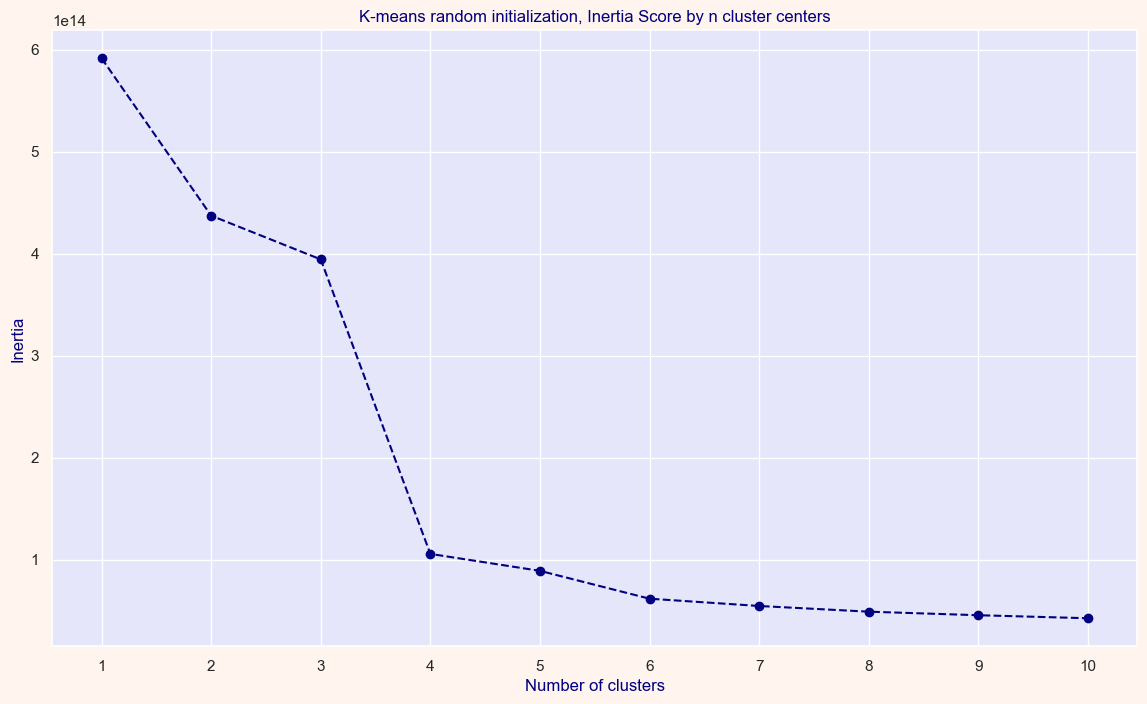

In [39]:
#compute the clusters and the related inertia for v_dataframe_1
#and kmeans algo

di_kmeans_obj_1=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_1,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)


In [40]:
#from the elbow method we see that for a number of clusters superior to 4
#the differential benefit is not significant

In [41]:
#Considered dataframe: v_dataframe_1
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster decided from the kmeans algorithm. 
#The desired number of clusters is decided from the above figure 
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_1[4],\
val_dataframe_with_all_samples=v_dataframe_1,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_1                                                                                   
)

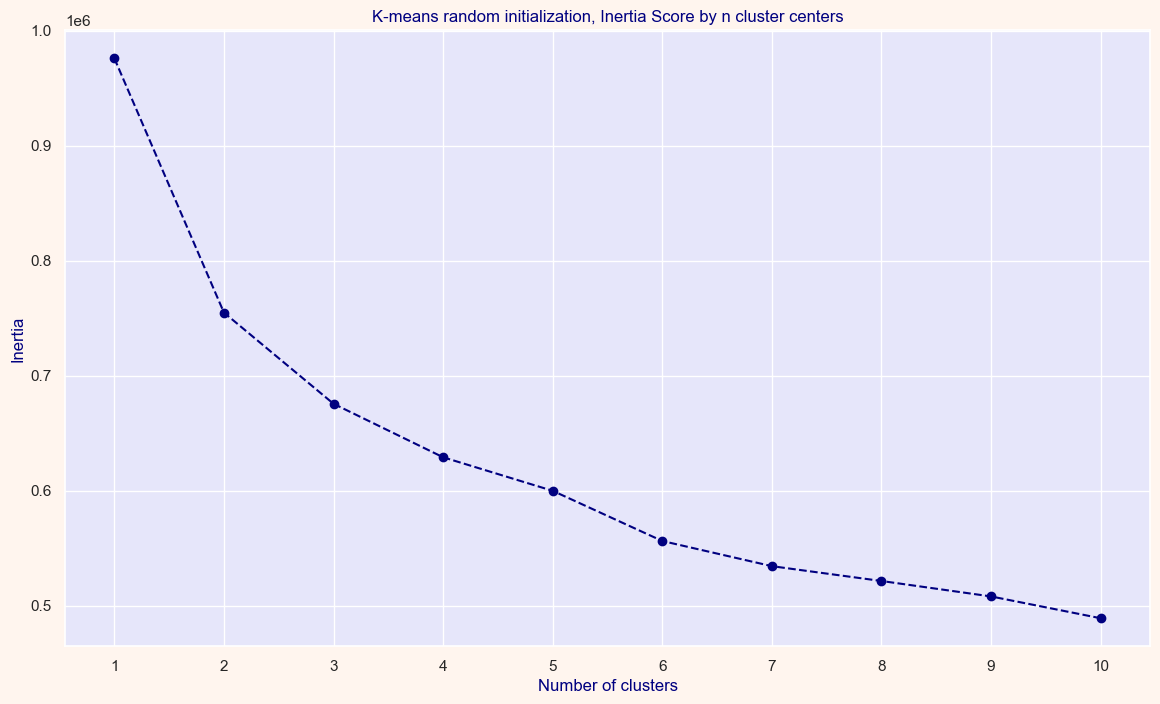

In [42]:
#compute the clusters and the related inertia for v_dataframe_1_stand
#and kmeans algo
di_kmeans_obj_1_stand=cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_1_stand,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)


In [43]:
#from the elbow method we see that for a number of clusters superior to 3
#the differential benefit is not significant

In [44]:
#Considered dataframe: v_dataframe_1_stand
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster defined by kmeans algorithm. 
#The desired number of clusters is decided from the above figure 
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_1_stand[3],\
val_dataframe_with_all_samples=v_dataframe_1_stand,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_1_stand                                                                                   
)

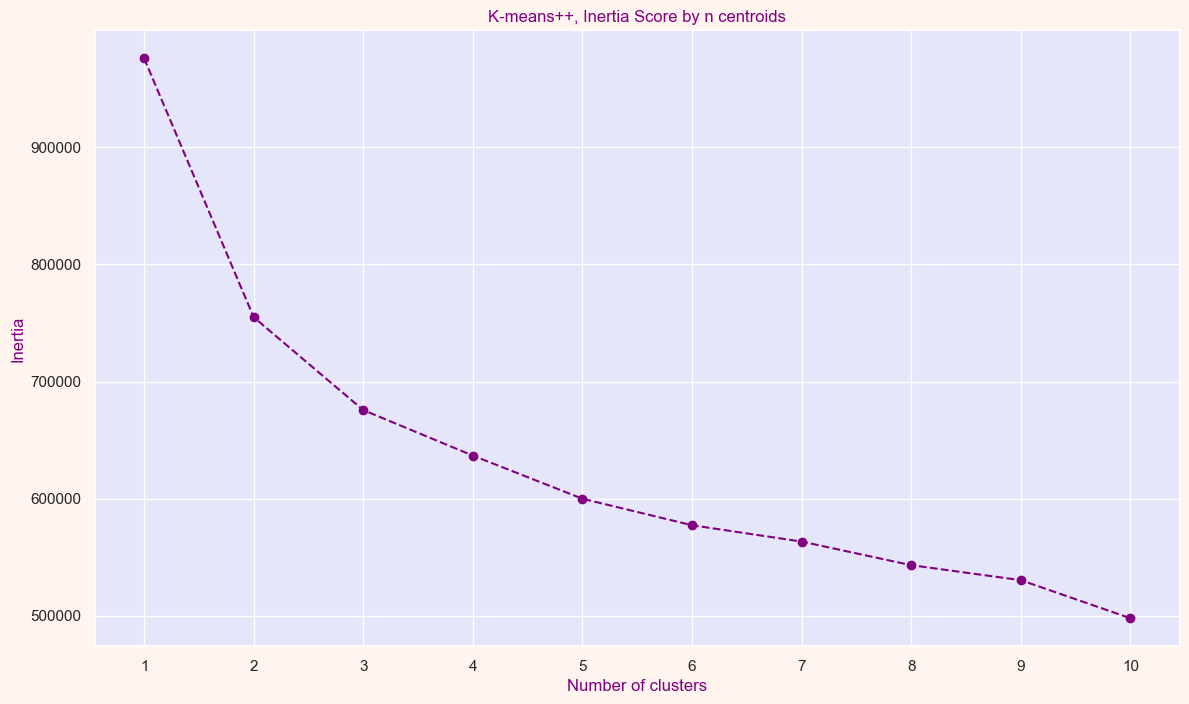

In [45]:
#compute the clusters and the related inertia for v_dataframe_1_stand
#and kmeans++ algo

di_kmeanspp_obj_1_stand=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_1_stand,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeanspp_obj,\
va_color=val_color_inertia_kmeanspp,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeanspp)


In [46]:
#when number of clusters >3 the differential difference in inertia diminishes

In [47]:
#Considered dataframe: v_dataframe_1_stand
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster created by kmeans++ algorith. 
#The desired number of clusters is decided from the above figure.
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeanspp_obj_1_stand[3],\
val_dataframe_with_all_samples=v_dataframe_1_stand,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_1_stand_kmpp                                                                                   
)

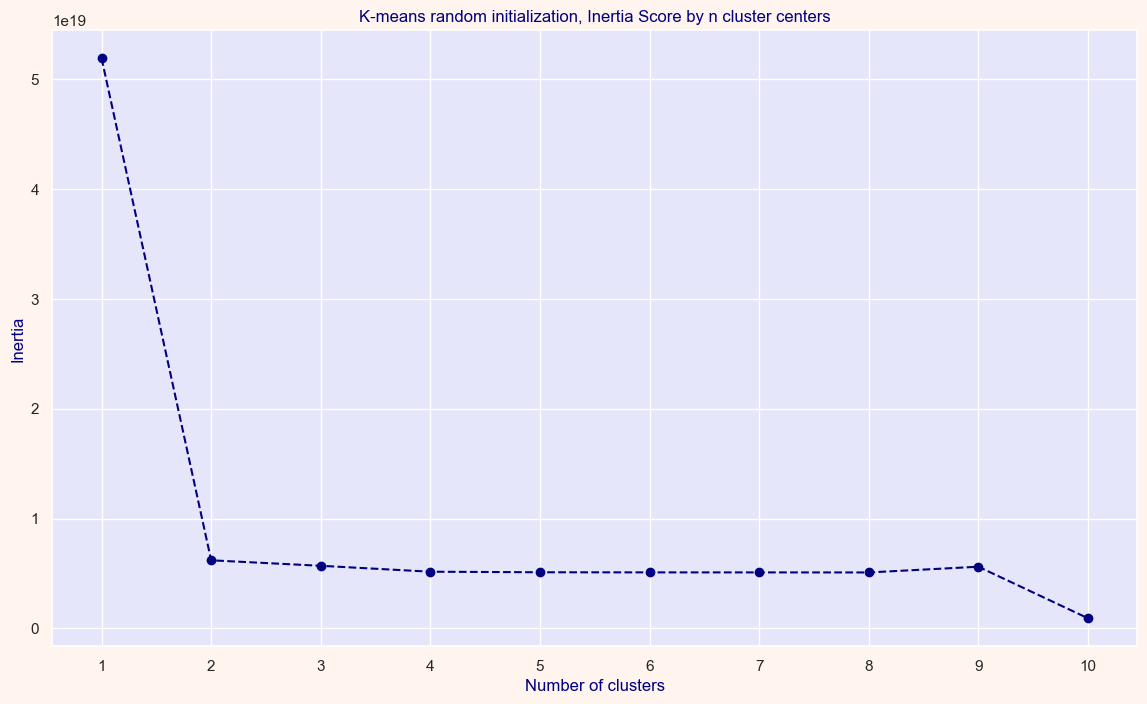

In [48]:
#compute the clusters and the related inertia for v_dataframe_2
#and kmeans algo


di_kmeans_obj_2=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_2,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)


In [49]:
#when number of clusters >2 the differential difference in inertia diminishes

In [50]:
#Considered dataframe: v_dataframe_2
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster created by kmeans algorith. 
#The desired number of clusters is decided from the above figure.
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_2[2],\
val_dataframe_with_all_samples=v_dataframe_2,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_2_km                                                                                  
)

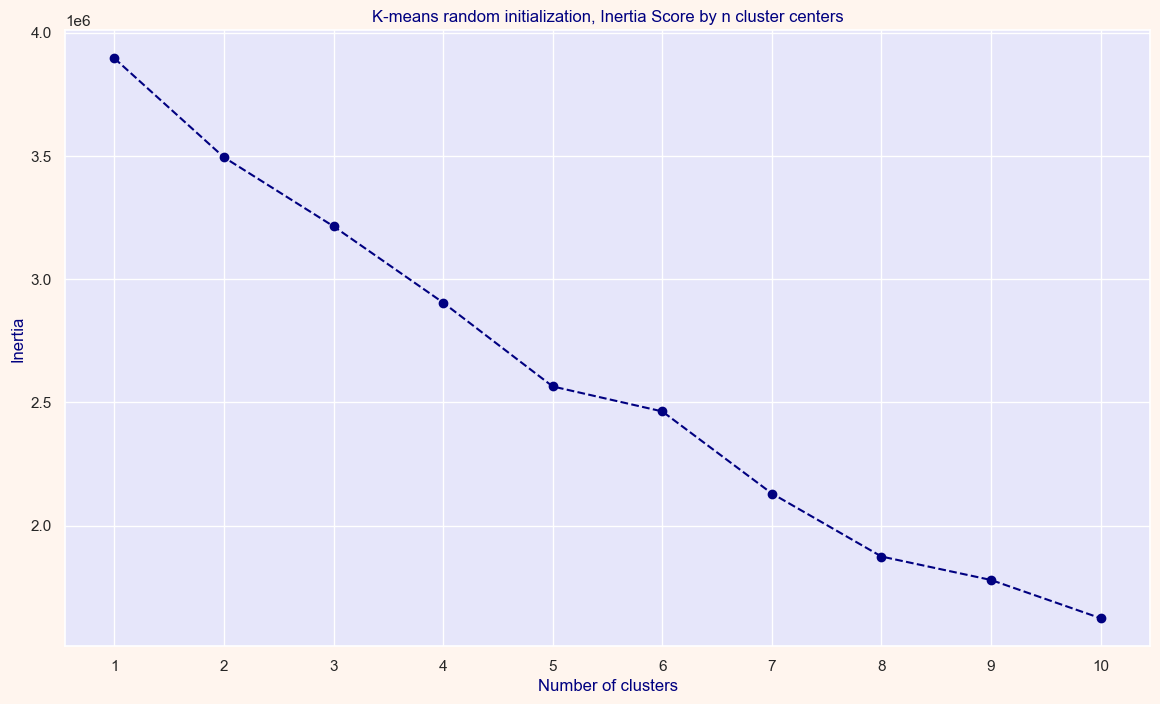

In [51]:
#compute the clusters and the related inertia for v_dataframe_2_stand
#standardized
#and kmeans algo

di_kmeans_obj_2_stand=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_2_stand,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)



In [52]:
#nb clusters >5 difference in inertia gets smaller

In [53]:
#Considered dataframe: v_dataframe_2_stand
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster created by kmeans algorith. 
#The desired number of clusters is decided from the above figure.
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_2_stand[5],\
val_dataframe_with_all_samples=v_dataframe_2_stand,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_2_km_stand                                                                                  
)

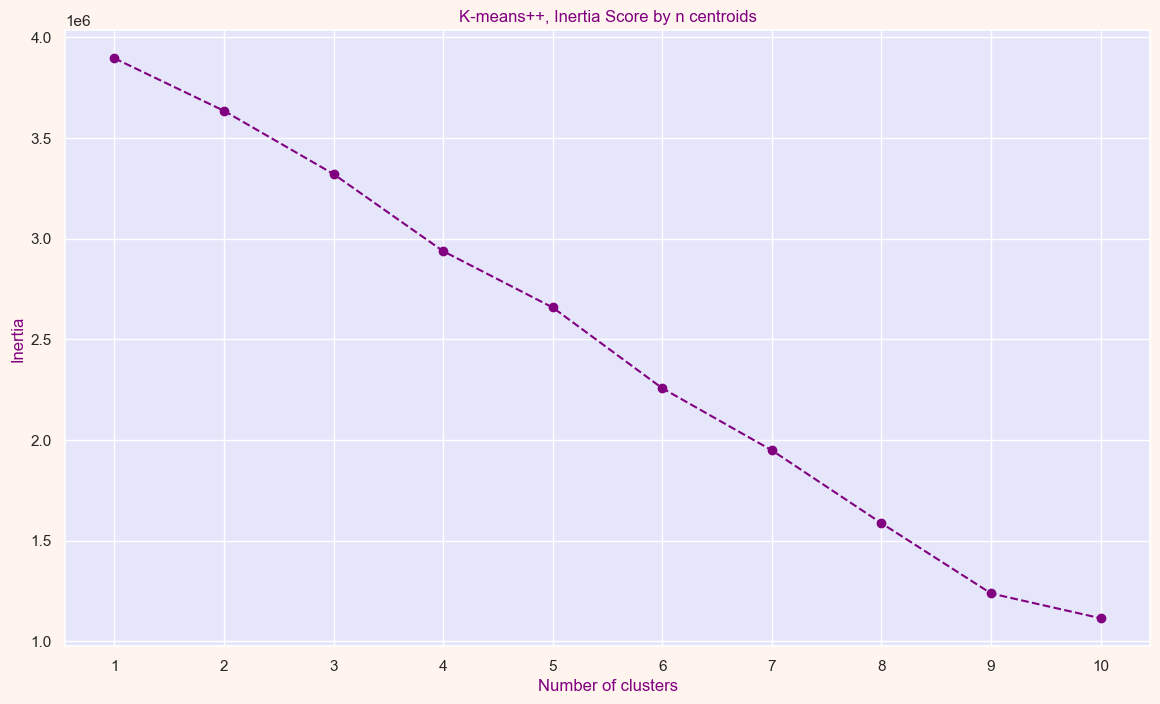

In [54]:
#compute the clusters and the related inertia for v_dataframe_2 standardized
#and kmeans++ algo


di_kmeanspp_obj_2_stand=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=v_dataframe_2_stand,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeanspp_obj,\
va_color=val_color_inertia_kmeanspp,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeanspp)


In [55]:
#when number of clusters >4 (or 5 or 9 ) the differential difference in inertia diminishes

In [56]:
#Considered dataframe: v_dataframe_2_stand
#we create and save in memory  all the datframes containing the samples 
#belonging to each  considered cluster created by kmeans++ algorith. 
#The desired number of clusters is decided from the above figure.
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeanspp_obj_2_stand[4],\
val_dataframe_with_all_samples=v_dataframe_2_stand,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_2_kmpp_stand                                                                                  
)

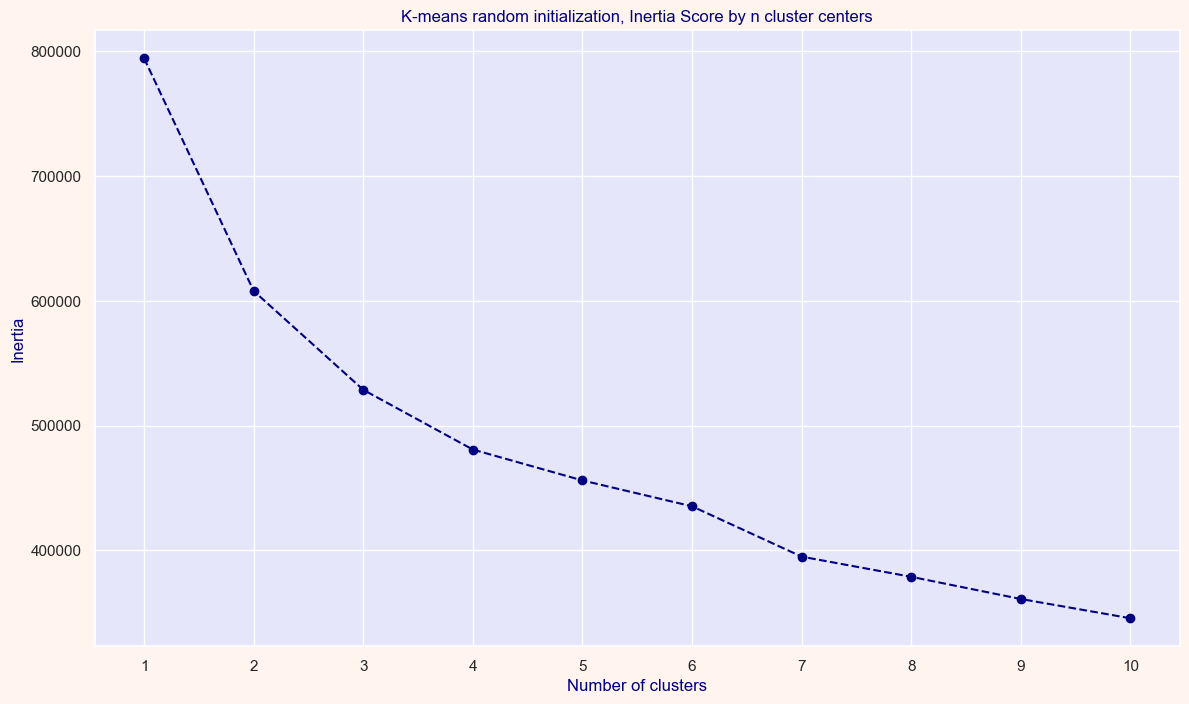

In [57]:
#compute the clusters and the related inertia for df_7_pcs 
#dataframe with Principal Components Features
#and kmeans algo



di_kmeans_obj_7_pcs=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=df_7_pcs,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)


In [58]:
#in this case a sharp elbows seem to appear one for number of clusters >2
#and one fornumber ofo clusters > to 7
#perhaps these two values have to be examined separtly before selecting 
#the value of the number of clusters to be considered

In [59]:
#we create and save in memory the dict with the dataframes comprised
#of the samples belonging to each cluster
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_7_pcs[2],\
val_dataframe_with_all_samples=df_7_pcs,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_7_km_pcs                                                                                  
)

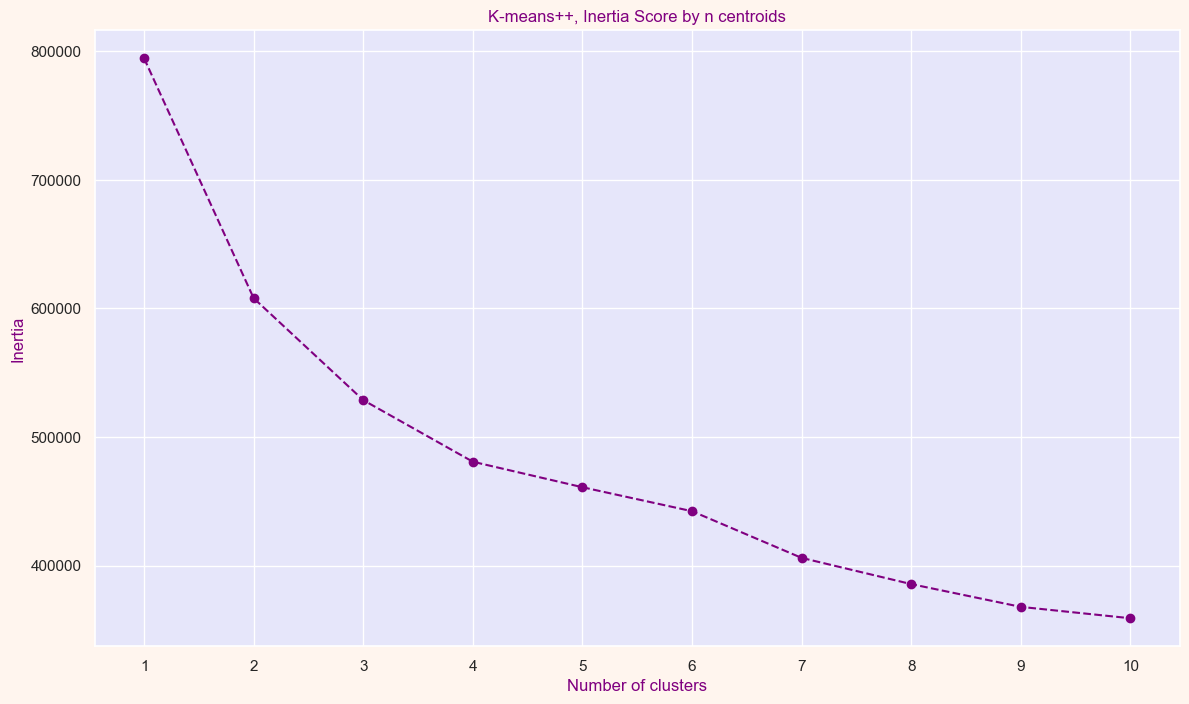

In [60]:
#compute the clusters and the related inertia for df_7_pcs
#dataframe with Principal Components Features
#and kmeans++ algo

di_kmeanspp_obj_7_pcs=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=df_7_pcs,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeanspp_obj,\
va_color=val_color_inertia_kmeanspp,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeanspp)




In [61]:
#as previously two elbows seem to appear
#when the number of clusters >2 and when the
#number of lcusters >3.

#Both these values should be examined before the final decision

In [62]:
#we create and save in memory the dict with the dataframes comprised
#of the samples belonging to each cluster
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeanspp_obj_7_pcs[2],\
val_dataframe_with_all_samples=df_7_pcs,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_7_kmpp_pcs                                                                                  
)

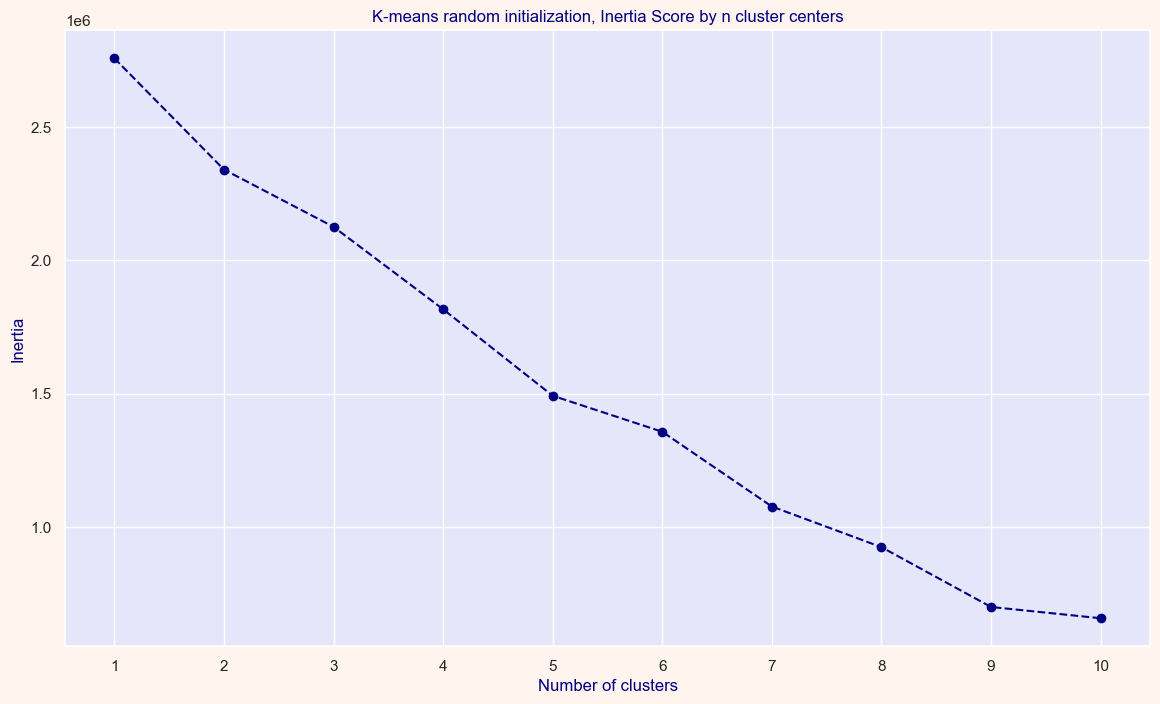

In [63]:
#df_e_pcs

#compute the clusters and the related inertia for df_e_pcs 
#dataframe with Principal Components Features
#and kmeans algo



di_kmeans_obj_e_pcs=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=df_e_pcs,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeans_obj,\
va_color=val_color_inertia_kmeans,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeans)


In [64]:
#for a number of clusters >2 the differential difference in inertia 
#is diminishing.

In [65]:
#we create and save in memory the dict with the dataframes comprised
#of the samples belonging to each cluster
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeans_obj_e_pcs[2],\
val_dataframe_with_all_samples=df_e_pcs,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_e_km_pcs                                                                                  
)

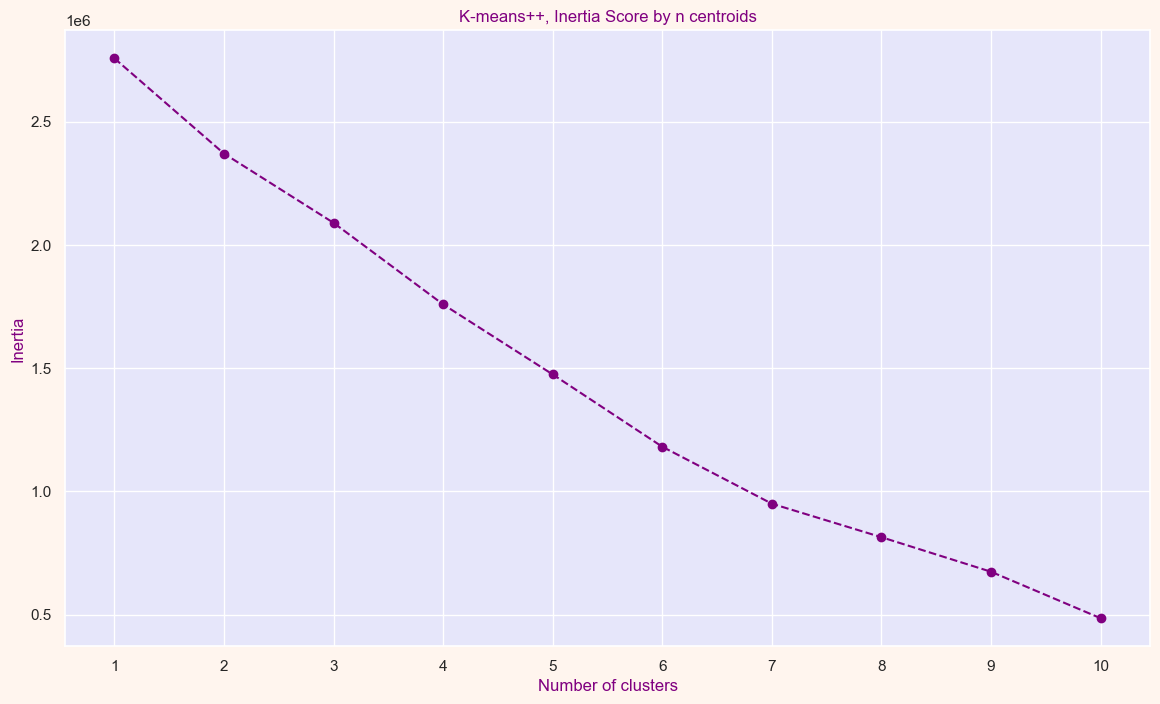

In [66]:
#compute the clusters and the related inertia for df_e_pcs
#dataframe with Principal Components Features
#and kmeans++ algo


di_kmeanspp_obj_e_pcs=\
cc_fi_fcts_data_treatment.fct_define_clusters_and_plot_inertia(\
va_name_dataframe=df_e_pcs,\
va_list_number_clusters=val_list_number_clusters,\
va_type_init_kmeans_obj=val_type_init_kmeanspp_obj,\
va_color=val_color_inertia_kmeanspp,\
va_verbose_inertia=v_verbose_inertia,\
va_title_x_label="Number of clusters",\
va_title_y_label="Inertia",\
va_title=val_title_kmeanspp)

In [67]:
#when the number of clusters is higher than 2
#the differential difference in inertia
#is getting lower.

In [68]:
#we create and save in memory the dict with the dataframes comprised
#of the samples belonging to each cluster
cc_fi_fcts_data_treatment.\
fct_create_and_save_in_memory_dict_dfs_with_cluster_samples_from_cluster_object(\
val_cluster_obj=di_kmeanspp_obj_e_pcs[2],\
val_dataframe_with_all_samples=df_e_pcs,\
val_name_dict_dfs_pickled=val_name_di_dfs_per_cluster_for_pickle_e_kmpp_pcs                                                                                  
)

### DBSCAN:
### Density-Based Spatial Clustering of Applications with Noise

### DBSCAN for v_dataframe_1_stand

In [69]:

#we create  numbers starting from 0.1 with a step of 0.5
#until 5 (stop)
epsilons = np.arange(0.1, 5, 0.5)
li_number_samples=[3,5,10,20]
epsilons,li_number_samples

(array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]), [3, 5, 10, 20])

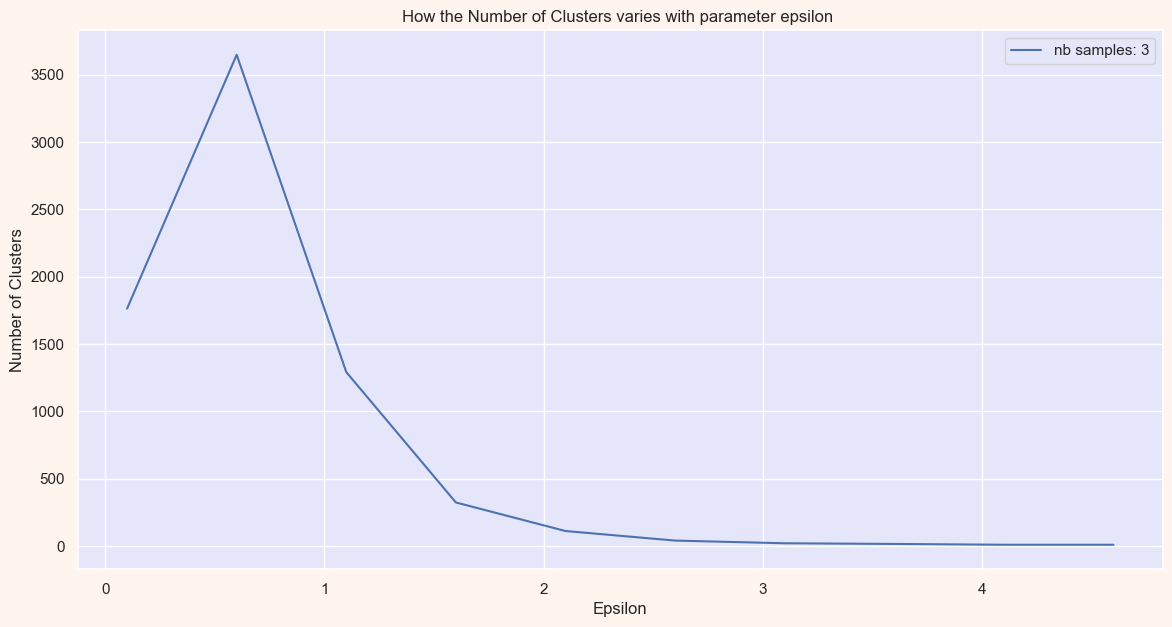

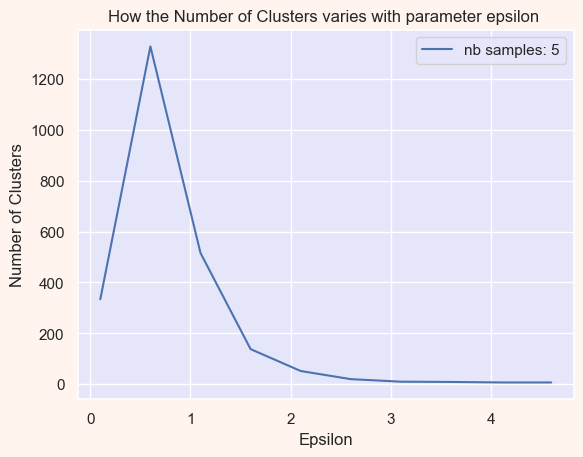

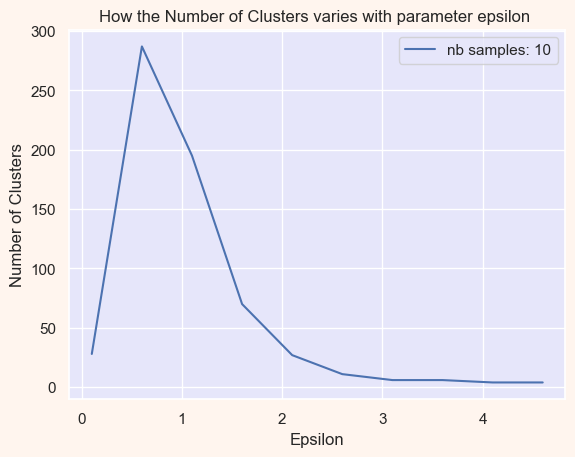

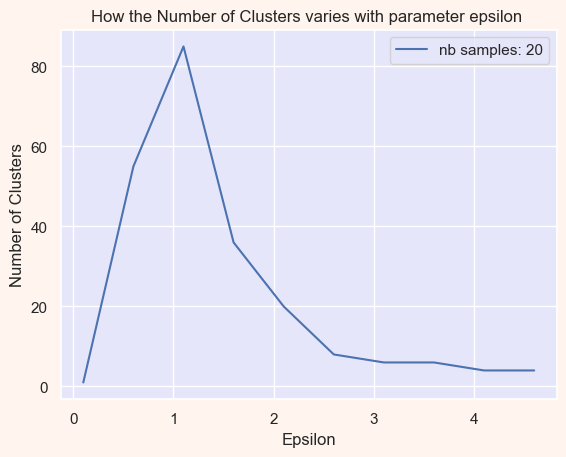

In [70]:
#di_1=dict
#key=the number of samples
#value=the number of clusters

#di_2 dict
#key=the number of samples
#value=dict, key= value of parameter epsilon
#value=dbscan object


di_1, di_2=\
cc_fi_fcts_data_treatment.fct_create_and_plot_dbscan_clusters(\
val_array_epsilons=epsilons,\
val_li_samples=li_number_samples,
val_dataframe=v_dataframe_1_stand
)

In [71]:
#import sys
#sys.exit()

SystemExit: 

/Users/jennie/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


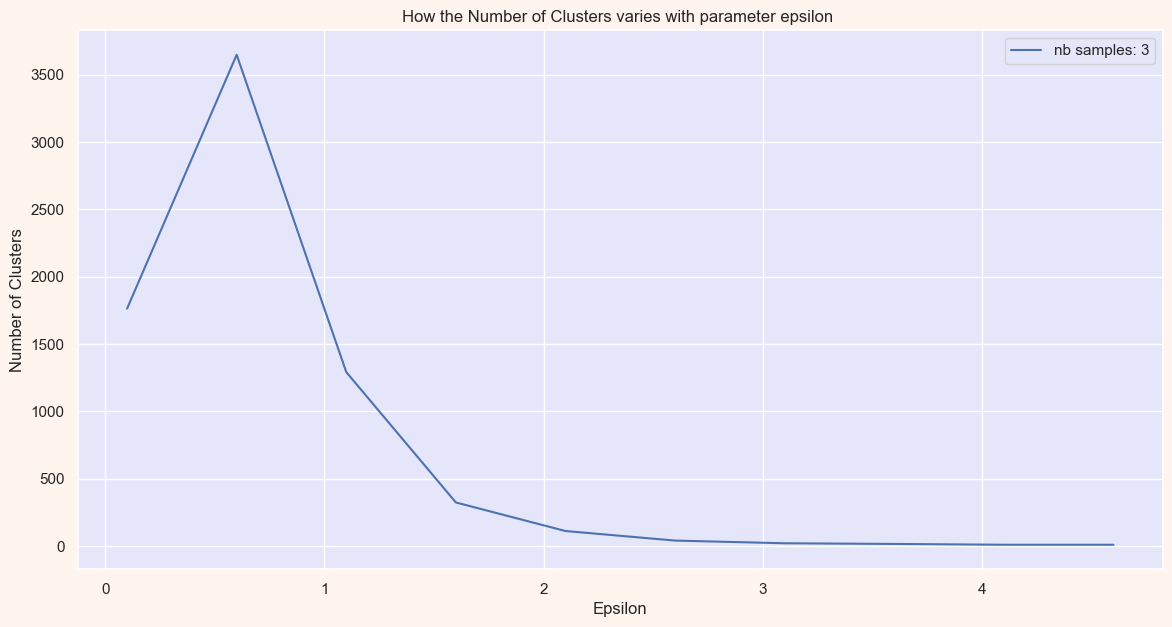

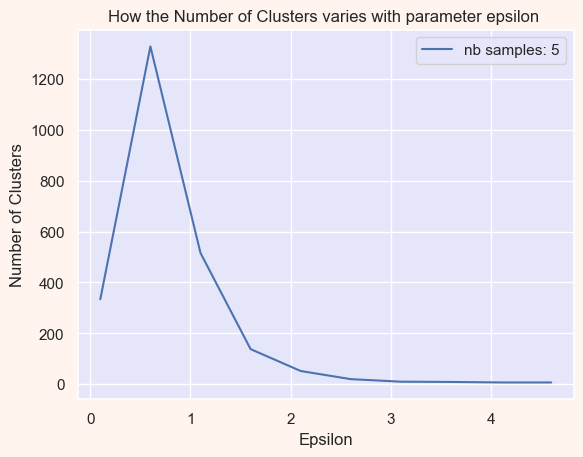

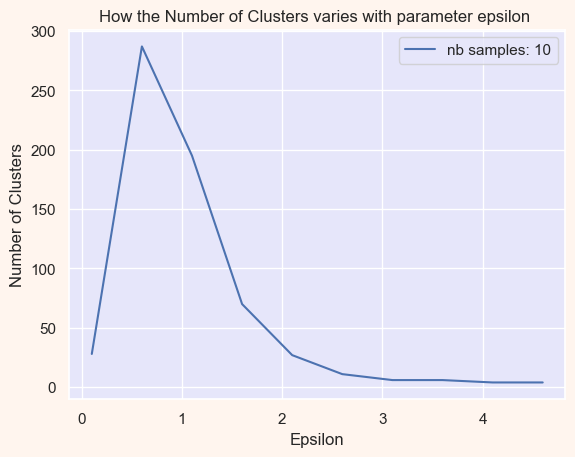

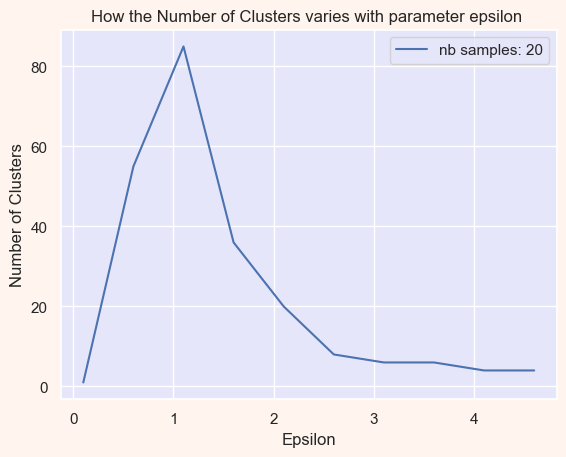

In [72]:
di_dbscan_clusters, di_dbscan_obj=\
cc_fi_fcts_data_treatment.fct_create_and_plot_dbscan_clusters(\
val_array_epsilons=epsilons,\
val_li_samples=li_number_samples,
val_dataframe=v_dataframe_1_stand
)

In [74]:
#we save in memory the dictionary with the dbscan number of cluster so
#as to be able to use it later 
with open("di_dbscan_clusters.pkl", 'wb') as fp0:
        pickle.dump(di_dbscan_clusters,fp0)

In [75]:
#we save in memory the dictionary with the dbscan objects so
#as to be able to use it later 
with open("di_dbscan_obj.pkl", 'wb') as fp1:
        pickle.dump(di_dbscan_obj,fp1)